**1.Importing Required Libraries**

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the `kaggle.json` file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamsika07","key":"1fe51045b5ac146e2ef9e786fd0591e7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
License(s): other
  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 40.6MB/s]


In [ ]:
!unzip top-spotify-songs-2023.zip

Archive:  top-spotify-songs-2023.zip
  inflating: spotify-2023.csv        


In [ ]:
import os
print(os.listdir())  # This will list all files in the current directory


['.config', 'top-spotify-songs-2023.zip', 'kaggle.json', 'spotify-2023.csv', 'sample_data']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2.Load the dataset from Kaggle**


**3:Reading Dataset**




In [ ]:
df = pd.read_csv('spotify-2023.csv',encoding = 'latin-1')

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**4:Analyzing the Data**

In [ ]:
df.shape

(953, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
# Calculate the proportion of missing values
missing_proportion = df.isnull().mean()
print(missing_proportion[missing_proportion > 0])

in_shazam_charts    0.052466
key                 0.099685
dtype: float64


In [ ]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [ ]:
# Option 2: Fill with the most common key
most_common_key = df['key'].mode()[0]
df['key'] = df['key'].fillna(most_common_key)

In [ ]:
print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [ ]:
# Step 1: Check for non-numeric values
print(df['streams'].unique())  # Check unique values to identify issues
print(df['in_deezer_playlists'].unique())
print(df['in_shazam_charts'].unique())

['141381703' '133716286' '140003974' '800840817' '303236322' '183706234'
 '725980112' '58149378' '95217315' '553634067' '505671438' '58255150'
 '1316855716' '387570742' '2513188493' '1163093654' '496795686' '30546883'
 '335222234' '363369738' '86444842' '52135248' '1297026226' '200647221'
 '115364561' '78300654' '899183384' '61245289' '429829812' '127408954'
 '22581161' '52294266' '843957510' '999748277' '618990393' '123122413'
 '188933502' '1355959075' '786181836' '176553476' '354495408' '2808096550'
 '1109433169' '1047101291' '65156199' '570515054' '1085685420'
 '1647990401' '2565529693' '518745108' '107753850' '177740666' '153372011'
 '57876440' '1813673666' '3703895074' '256483385' '1214083358' '16011326'
 '812019557' '111947664' '156338624' '720434240' '357925728' '674072710'
 '1755214421' '404562836' '373199958' '14780425' '39578178' '54266102'
 '2557975762' '751134527' '2282771485' '1356565093' '1592909789'
 '635412045' '1230675890' '585695368' '43857627' '2009094673' '600976848

In [ ]:
# Step 2: Convert columns to numeric, forcing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [ ]:
# Step 3: Review the rows with NaN values
print(df[df['streams'].isna()])  # Check rows where 'streams' became NaN
print(df[df['in_deezer_playlists'].isna()])  # Check for 'in_deezer_playlists'
print(df[df['in_shazam_charts'].isna()])  # Check for 'in_shazam_charts'

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...  bpm  key   mode  \
574                  0      NaN                  16  ...  110    A  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
574              53         75       69              7                   0   

     liveness_%  speechiness_%  
574          17              3  

[1 rows x 24 columns]
              track_name         artist(s)_name  artist_count  released_year  \
48               Starboy  The Weeknd, Daft Punk             2           2016   
54          Another Love              Tom Odell             1           2012   
55       Blinding Lights             The Weeknd        

In [ ]:
# Optionally, drop rows with NaN values in the relevant columns
df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'], inplace=True)


In [ ]:
# Convert relevant object columns to integers
df['streams'] = df['streams'].astype(int)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
!pip install seaborn
import seaborn as sns


In [ ]:
# 1. Total Streams by Released Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='released_year', y='streams', data=yearly_popularity, marker='o')
plt.title('Total Streams by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Total Streams')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/total_streams_by_year.png')  # Save to Google Drive
plt.close()  # Close only after saving

In [ ]:
# 2. Top 10 Artists by Total Streams
plt.figure(figsize=(10, 6))
sns.barplot(x='streams', y='artist(s)_name', data=top_artists, palette='viridis')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist Name')
plt.savefig('/content/drive/MyDrive/top_10_artists.png')  # Save to Google Drive
plt.close()


<ipython-input-64-1e55fda2cad8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='artist(s)_name', data=top_artists, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

In [ ]:
# 3. Danceability vs Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=df)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/danceability_vs_energy.png')  # Save to Google Drive
plt.close()

In [ ]:
# 4. Histogram of Streams
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], bins=20)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/distribution_of_streams.png')  # Save to Google Drive
plt.close()

In [ ]:
# 5. Box Plot for Acousticness by Key
plt.figure(figsize=(10, 6))
sns.boxplot(x='key', y='acousticness_%', data=df)
plt.title('Acousticness by Key')
plt.xlabel('Key')
plt.ylabel('Acousticness (%)')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/acousticness_by_key.png')  # Save to Google Drive
plt.close()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_spotify_2023.csv', index=False)

In [ ]:
# Features to be used for prediction
features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Input (X) and output (y)
X = df[features]
y = df['streams']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")


Mean Squared Error: 1.8536894724040173e+17
R-Squared Score: 0.01126492835225057


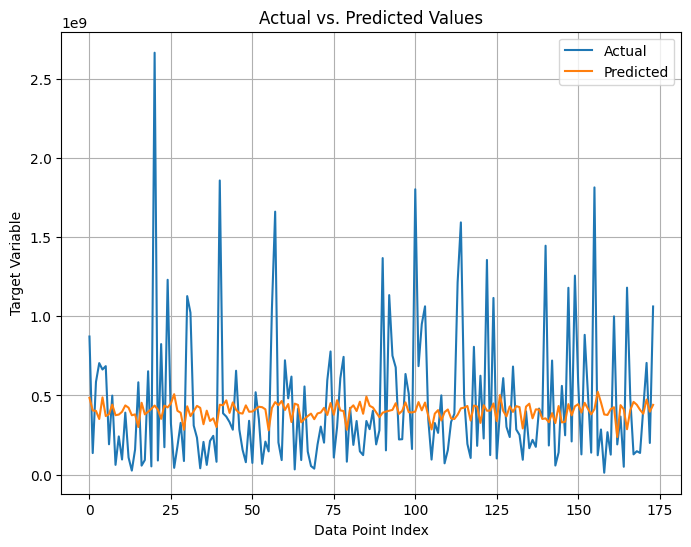

In [ ]:
x = np.arange(len(y_test))

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(x, y_test, label='Actual')#, marker='o')  # Plot actual values
plt.plot(x, y_pred, label='Predicted')#, marker='x')  # Plot predicted values
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save your trained model (replace `model` with the name of your model variable)
joblib.dump(model, '/content/drive/MyDrive/spotify_model.pkl')  # Save to Google Drive


Mounted at /content/drive


['/content/drive/MyDrive/spotify_model.pkl']